In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from jupyterthemes import jtplot
jtplot.style(theme='onedork', context='notebook', grid=False, ticks=True)

In [1]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

2023-04-24 16:26:12.266835: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-24 16:26:12.843608: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-04-24 16:26:13.543813: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2023-04-24 16:26:13.543843: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: ASUS-TUF-DASH-F15
2023-04-24 16:26:13.543846: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: ASUS-TUF-DASH-F15
2023-04-24 16:26:13.543940: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:19

In [5]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [7]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [28]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [31]:
y_train.reshape(-1)

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [32]:
y_train = y_train.reshape(-1)

In [33]:
def plot(X, y, index):
    plt.figure(figsize=(1,1))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

In [36]:
X_train.shape

(50000, 32, 32, 3)

(None, None, None)

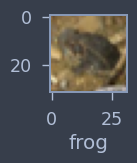

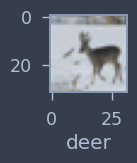

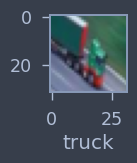

In [34]:
plot(X_train, y_train, 23), plot(X_train, y_train, 20), plot(X_train, y_train, 50)

In [35]:
X_train = X_train/255
X_test = X_test/255

In [37]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    tf.keras.layers.MaxPool2D((2,2)),
    
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

2023-04-23 14:12:56.934838: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2073 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [38]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [39]:
model.fit(X_train, y_train, epochs=30)

2023-04-23 14:13:57.850308: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.
2023-04-23 14:13:58.276246: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/30


2023-04-23 14:13:59.775195: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-04-23 14:14:00.823610: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-04-23 14:14:00.825713: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x5597e092bd90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-04-23 14:14:00.825729: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2023-04-23 14:14:00.829149: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-04-23 14:14:00.934554: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifeti

1563/1563 [==============================] - 7s 2ms/step - loss: 1.4493 - accuracy: 0.4814
Epoch 2/30
1563/1563 [==============================] - 3s 2ms/step - loss: 1.0955 - accuracy: 0.6164
Epoch 3/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.9753 - accuracy: 0.6598
Epoch 4/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.8923 - accuracy: 0.6895
Epoch 5/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.8342 - accuracy: 0.7098
Epoch 6/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.7772 - accuracy: 0.7307
Epoch 7/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.7291 - accuracy: 0.7459
Epoch 8/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.6855 - accuracy: 0.7605
Epoch 9/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.6528 - accuracy: 0.7730
Epoch 10/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.6137 - accurac

In [40]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 1.7147 - accuracy: 0.6806


[1.7146950960159302, 0.6805999875068665]

In [41]:
preds=model.predict(X_test)

313/313 [==============================] - 0s 830us/step


In [44]:
y_preds=[]
for i in range(len(y_test)):
    y_preds.append(np.argmax(preds[i]))

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.67      0.75      0.71      1000
           1       0.76      0.85      0.80      1000
           2       0.49      0.64      0.56      1000
           3       0.53      0.49      0.51      1000
           4       0.65      0.62      0.64      1000
           5       0.63      0.50      0.56      1000
           6       0.73      0.74      0.74      1000
           7       0.79      0.67      0.73      1000
           8       0.80      0.80      0.80      1000
           9       0.79      0.75      0.77      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000

